# Modeling Attempt #2:

## Using a RandomForestRegressor:
The ensemble learning technique implement by RandomForestRegressor will help create a more accurate model and stable prediction. I plan to implement boosting and bootstrapping techniques to improve the model's performance.




In [1]:
import pandas as pd
import numpy as np
import sklearn.pipeline as pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv('cleaned_data.csv')
df.head()

,Team,Home/Away,Opp,MP_G,FG_G,FGA_G,FG%_G,3P_G,3PA_G,3P%_G,...,FT%_Sn,ORB_Sn,DRB_Sn,TRB_Sn,AST_Sn,STL_Sn,BLK_Sn,TOV_Sn,PF_Sn,PTS_Sn
0,DAL,Away,PHO,19,1,3,0.333,1,3,0.333,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
1,DAL,Home,MIN,20,3,7,0.429,1,4,0.250,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
2,DAL,Home,CHI,14,2,7,0.286,2,4,0.500,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
3,DAL,Away,ATL,18,3,9,0.333,0,3,0.000,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
4,DAL,Away,TOR,29,3,11,0.273,2,4,0.500,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          467 non-null    object 
 1   Home/Away     467 non-null    object 
 2   Opp           467 non-null    object 
 3   MP_G          467 non-null    int64  
 4   FG_G          467 non-null    int64  
 5   FGA_G         467 non-null    int64  
 6   FG%_G         467 non-null    float64
 7   3P_G          467 non-null    int64  
 8   3PA_G         467 non-null    int64  
 9   3P%_G         467 non-null    float64
 10  FT_G          467 non-null    int64  
 11  FTA_G         467 non-null    int64  
 12  FT%_G         467 non-null    float64
 13  ORB_G         467 non-null    int64  
 14  DRB_G         467 non-null    int64  
 15  TRB_G         467 non-null    int64  
 16  AST_G         467 non-null    int64  
 17  STL_G         467 non-null    int64  
 18  BLK_G         467 non-null    

In [3]:
df.columns


Index(['Team', 'Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'W/L_Margin', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP',
       'Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn',
       '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn',
       'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn',
       'PF_Sn', 'PTS_Sn'],
      dtype='object')

In [51]:
df['W/L_Margin'].min()
df['W/L_Margin'].max()


51

# Binning the Win-Loss Margin
Since predicting an exact number for the margin is extremely diffficult, I will create bins for the target variable:

- 5 = Tight Victory
- 10 = Medium Victory
- 20 = Blowout Victory

- -5 = Tight Loss
- -10 = medium loss
- -20 = blowout loss

In [55]:
# Creating the function to bin the target variable

def bin_margin(margin):
    if 1 <= margin <= 5:
        return 'Close Victory'
    elif 6 <= margin <= 19:
        return 'Medium Victory'
    elif margin >= 20:
        return 'Blowout Victory'
    elif -5 <= margin <= -1:  
        return 'Tight Loss'
    elif -19 <= margin <= -6: 
        return 'Medium Loss'
    elif margin <= -20:
        return 'Blowout Loss'
    elif margin == 0:  
        return 'Tie'
    else:
        return 'Unknown'
    

df['Target'] = df['W/L_Margin'].apply(bin_margin)
df['Target'].value_counts()



Target
Medium Victory     145
Medium Loss        113
Tight Loss          64
Close Victory       63
Blowout Victory     56
Blowout Loss        26
Name: count, dtype: int64

In [57]:
df.drop(columns=['W/L_Margin'], inplace=True)
df.head()


,Team,Home/Away,Opp,MP_G,FG_G,FGA_G,FG%_G,3P_G,3PA_G,3P%_G,FT_G,FTA_G,FT%_G,ORB_G,DRB_G,TRB_G,AST_G,STL_G,BLK_G,TOV_G,PF_G,PTS_G,GmSc,Plus/Minus_G,Season,...,ValORP,Avg_MP_Sn,FG_Sn,FGA_Sn,FG%_Sn,3P_Sn,3PA_Sn,3P%_Sn,2P_Sn,2PA_Sn,2P%_Sn,eFG%_Sn,FT_Sn,FTA_Sn,FT%_Sn,ORB_Sn,DRB_Sn,TRB_Sn,AST_Sn,STL_Sn,BLK_Sn,TOV_Sn,PF_Sn,PTS_Sn,Target
0,DAL,Away,PHO,19,1,3,0.333,1,3,0.333,0,0,0.0,0,1,1,1,0,0,0,1,3,1.9,-3,2018-19,...,0.1,21.8,3.6,7.7,0.467,0.9,2.5,0.348,2.8,5.3,0.523,0.523,1.2,1.6,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Blowout Loss
1,DAL,Home,MIN,20,3,7,0.429,1,4,0.250,0,0,0.0,0,0,0,1,1,0,1,0,7,4.0,2,2018-19,...,0.1,21.8,3.6,7.7,0.467,0.9,2.5,0.348,2.8,5.3,0.523,0.523,1.2,1.6,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Close Victory
2,DAL,Home,CHI,14,2,7,0.286,2,4,0.500,0,0,0.0,0,1,1,2,1,0,0,0,6,4.6,4,2018-19,...,0.1,21.8,3.6,7.7,0.467,0.9,2.5,0.348,2.8,5.3,0.523,0.523,1.2,1.6,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Medium Victory
3,DAL,Away,ATL,18,3,9,0.333,0,3,0.000,0,0,0.0,0,5,5,1,0,0,1,2,6,1.3,5,2018-19,...,0.1,21.8,3.6,7.7,0.467,0.9,2.5,0.348,2.8,5.3,0.523,0.523,1.2,1.6,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Medium Loss
4,DAL,Away,TOR,29,3,11,0.273,2,4,0.500,0,0,0.0,0,3,3,4,1,0,2,2,8,3.4,-3,2018-19,...,0.1,21.8,3.6,7.7,0.467,0.9,2.5,0.348,2.8,5.3,0.523,0.523,1.2,1.6,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3,Medium Loss


## Building the model pipeline

Prep the data

In [58]:
# Get numerical and categorical columns
categorical_columns = df[['Team', 'Home/Away', 'Opp', 'Season']]
categorical_columns

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['W/L_Margin']]

categorical_features = categorical_columns.columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G', '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G', 'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc', 'Plus/Minus_G', 'Ttl_MP_Sn', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP', 'Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn', '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn', 'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn', 'PF_Sn', 'PTS_Sn']
Categorical features: ['Team', 'Home/Away', 'Opp', 'Season']


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# Separate features and target
X = df.drop(columns=['Target'])
y = df['Target']

label_encoder = LabelEncoder()
y_transformed = label_encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.25, random_state=42)

In [60]:
print(X_train.shape)
print(X_test.shape)


(350, 69)
(117, 69)


In [61]:
# one hot encoding the categorical features
# using min max scaler to take care of negative and positive values in the dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False), categorical_features),
        ('scaler', MinMaxScaler(feature_range=(-1,1)), numerical_features)
    ], 
    remainder='passthrough'
)

In [69]:
# We will first start with basic parameters and then hyper tune later
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', RandomForestClassifier(
        random_state=42,
        max_depth=10,
        n_estimators=100,
        bootstrap=True,
        oob_score=True
    ))
])




In [70]:
# Fit the pipeline
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = rf_pipeline.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
oob_score = rf_pipeline.steps[1][1].oob_score_

print(f"OOB Score: {oob_score}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OOB Score: 0.42
Mean Squared Error: 2.6666666666666665
R^2 Score: -0.40205868797050215


So far this model is performing significantly better than the baseline model. 

The OOB score validates the bagging algorithm and tells us the error rate of the model or the number of correctly predicted data on Out of Bag samples taken for validation. In this case, the model is 44% accurate. 

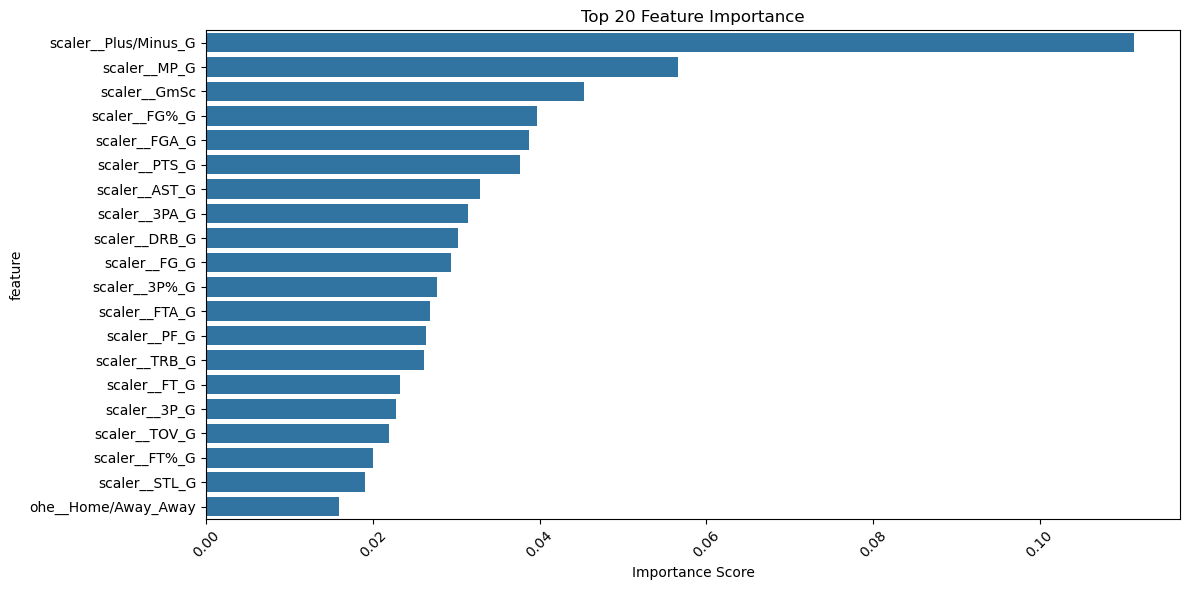

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Feature Importance Plot (top 20 features)
feature_names = preprocessor.get_feature_names_out()

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_pipeline.named_steps['estimator'].feature_importances_
})

feature_importance = feature_importance.sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hyperparameter tuning with GridSearchCV

In [72]:
# We will first start with basic parameters and then hyper tune later
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', RandomForestRegressor(random_state=42,
                                        oob_score=True))
])




In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimator__n_estimators': [50, 100, 300],
    'estimator__max_depth': [5, 10, 20, 30, 40],
    'estimator__bootstrap': [True],
    

}

grid_search = GridSearchCV(rf_pipeline, 
                           param_grid, 
                           cv=5, 
                           scoring='r2')

grid_search.fit(X_train, y_train)

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Team',
                                                                          'Home/Away',
                                                                          'Opp',
                                                                          'Season']),
                                                                        ('scaler',
                                                                         MinMaxScaler(feature_range=(-1,
                                                                                                     1)),
                                                                         ['MP_G',
                                                                          'FG_G',
                                                                          'FGA_G',
                                                                          'FG%_G',
                                                                          '3P_G',
                                                                          '3PA_G',
                                                                          '3P%_G',
                                                                          'FT_G',
                                                                          'FTA_G',
                                                                          'FT%_G',
                                                                          'ORB_G',
                                                                          'DRB_G',
                                                                          'TRB_G',
                                                                          'AST_G',
                                                                          'STL_G',
                                                                          'BLK_G',
                                                                          'TOV_G',
                                                                          'PF_G',
                                                                          'PTS_G',
                                                                          'GmSc',
                                                                          'Plus/Minus_G',
                                                                          'Ttl_MP_Sn',
                                                                          'PER',
                                                                          'TS%',
                                                                          '3PAr',
                                                                          'FTr',
                                                                          'ORB%',
                                                                          'DRB%',
                                                                          'TRB%',
                                                                          'AST%', ...])])),
                                       ('estimator',
                                        RandomForestRegressor(oob_score=True,
                                                              random_state=42))]),
             param_grid={'estimator__bootstrap': [True],
                         'estimator__max_depth': [5, 10, 20, 30, 40],
                         'estimator__n_estimators': [50, 100, 300]},
             scoring='r2')

In [74]:
y_pred = grid_search.predict(X_test)

In [75]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_.named_steps['estimator']
print(f"OOB Score: {best_rf.oob_score_}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


Best parameters found: {'estimator__bootstrap': True, 'estimator__max_depth': 5, 'estimator__n_estimators': 300}
Best cross-validation score: 0.024561673444883202
OOB Score: 0.049556446842524915
R^2 Score: -0.037306937471377255


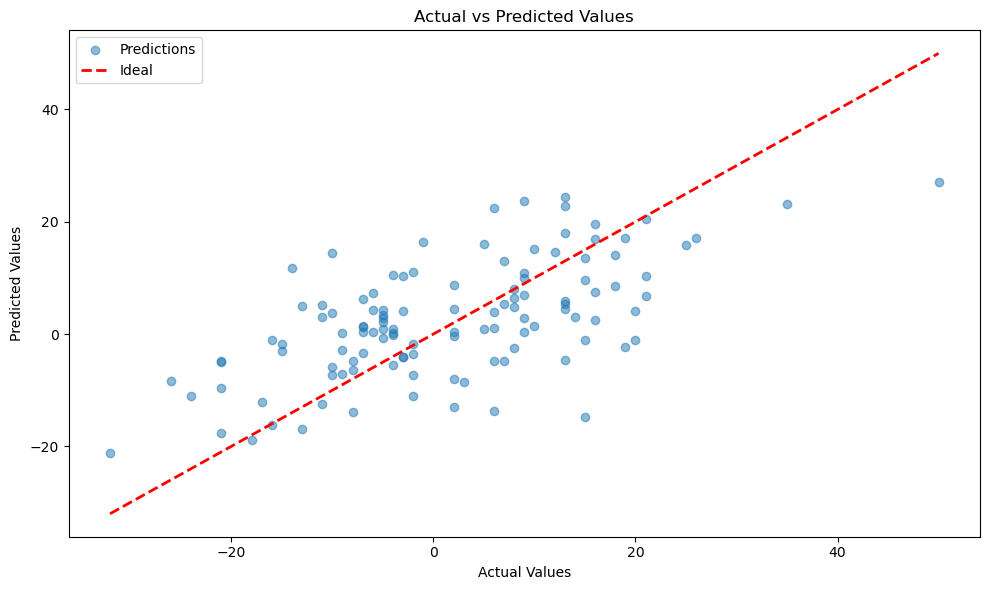

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs Predicted Values Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.legend()
plt.show()

OOB Score went up by 3%. This is progress!!!

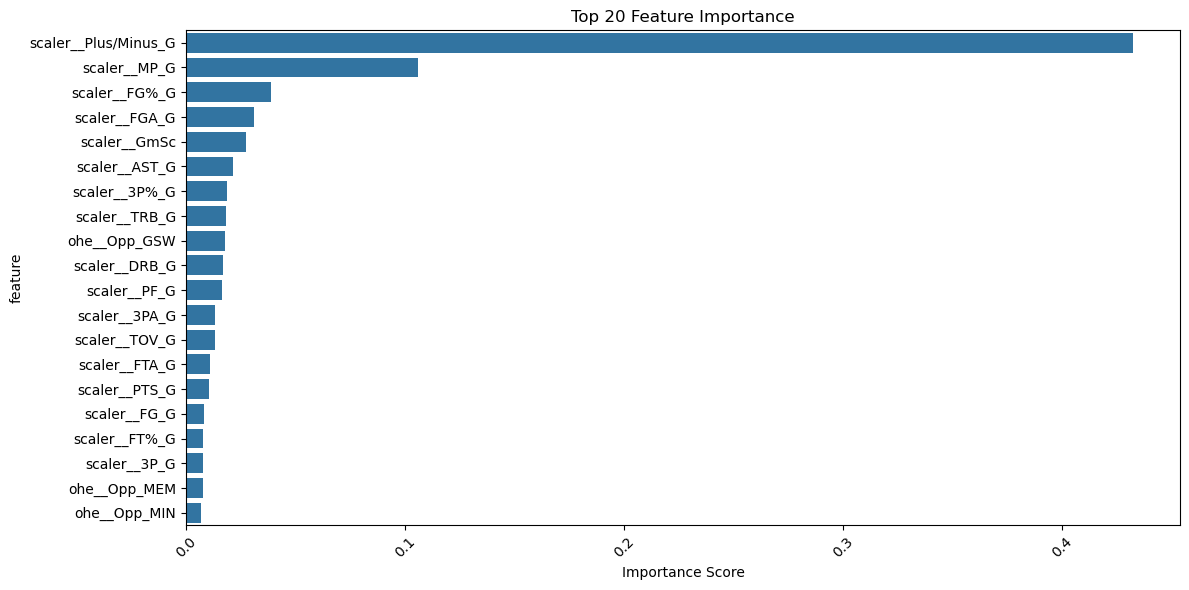

In [19]:
# Feature Importance Plot (top 20 features)
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': grid_search.best_estimator_.named_steps['regressor'].feature_importances_
})

feature_importance = feature_importance.sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Interpreting the Model's Performance

The Plus/Minus score per game, Minutes Player per game, Field Goal % per game, Field Goal Attempts per game, and Game Score per game are the most important for predicting the W/L Margin. 

This makes sense since Brunson got more play time after the first 2 seasons of his careeer. The plus minus score also tells us that while Brunson was on the court, his team scored more points than the other team. This is a very strong stat for measuring his impact on the team's success.

RandomForest got rid of the features highly correlated with Plus/Minus to introduce more information.

It is getting a wide scope of information from statistics that are different from one another though they may be correlated.





In [20]:
from sklearn.inspection import permutation_importance

# Get the transformed feature names after preprocessing
X_test_transformed = grid_search.best_estimator_.named_steps['preprocessor'].transform(X_test)

# Perform permutation importance on the transformed data
perm_importance = permutation_importance(
    grid_search.best_estimator_.named_steps['regressor'],  # Use only the regressor part
    X_test_transformed,  # Use transformed features
    y_test, 
    n_repeats=10, 
    random_state=42
)

# Get feature names from preprocessor
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Create DataFrame of permutation importance scores
perm_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_importance.importances_mean
})

sorted_importance = perm_importance_df.sort_values('importance_mean', ascending=False)

print("\nFeatures with zero or negative importance:")
print(sorted_importance[sorted_importance['importance_mean'] <= 0])

print("\nTop 10 features by permutation importance:")
print(perm_importance_df.sort_values('importance_mean', ascending=False).head(10))




Features with zero or negative importance:
                feature  importance_mean
33         ohe__Opp_WAS        -0.000004
37  ohe__Season_2021-22        -0.000030
14         ohe__Opp_HOU        -0.000040
79         scaler__DBPM        -0.000058
90       scaler__2PA_Sn        -0.000081
..                  ...              ...
48        scaler__FTA_G        -0.004355
95       scaler__FT%_Sn        -0.005099
73         scaler__USG%        -0.005732
18         ohe__Opp_MEM        -0.012358
59         scaler__GmSc        -0.022371

[68 rows x 2 columns]

Top 10 features by permutation importance:
                 feature  importance_mean
60  scaler__Plus/Minus_G         0.959611
40          scaler__MP_G         0.252008
42         scaler__FGA_G         0.029389
43         scaler__FG%_G         0.020473
52         scaler__TRB_G         0.015274
57          scaler__PF_G         0.008220
56         scaler__TOV_G         0.007274
45         scaler__3PA_G         0.006508
46         scaler__

Permutation importance scores represent the decrease in the model's performance when a feature is randomly shuffled.

In [21]:
pd.set_option('display.max_columns', 50)

#Features with zero or negative importance:
pd.DataFrame(sorted_importance[sorted_importance['importance_mean'] <= 0])


,feature,importance_mean
33,ohe__Opp_WAS,-0.000004
37,ohe__Season_2021-22,-0.000030
14,ohe__Opp_HOU,-0.000040
79,scaler__DBPM,-0.000058
90,scaler__2PA_Sn,-0.000081
...,...,...
48,scaler__FTA_G,-0.004355
95,scaler__FT%_Sn,-0.005099
73,scaler__USG%,-0.005732
18,ohe__Opp_MEM,-0.012358


The negative importance features indicate that these features are either adding noise, overfitting , or need some kind of transformation.

In [22]:
print("\nTop 10 features by permutation importance:")
pd.DataFrame(perm_importance_df.sort_values('importance_mean', ascending=False).head(10))



Top 10 features by permutation importance:


,feature,importance_mean
60,scaler__Plus/Minus_G,0.959611
40,scaler__MP_G,0.252008
42,scaler__FGA_G,0.029389
43,scaler__FG%_G,0.020473
52,scaler__TRB_G,0.015274
57,scaler__PF_G,0.008220
56,scaler__TOV_G,0.007274
45,scaler__3PA_G,0.006508
46,scaler__3P%_G,0.005779
50,scaler__ORB_G,0.005186


We want to focus on the top features. 

Let's try to use Polynomial Features to try and better fit the model to the data. This can help with balancing our weights and creating more interactions where it is meaningful to do so.

## Hyperparameter model #2

Using SelectKBest to select the top features, testing higher number of features, and limiting features wiht sqrt.

In [23]:
# Hyperparameter model #2

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

rf_pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_regression)),
    ('regressor', RandomForestRegressor(random_state=42,
                                        oob_score=True))
])


param_grid = {
    'feature_selector__k': [10, 20, 30],
    'regressor__n_estimators': [300, 400, 500], ## will more trees improve the model?
    'regressor__max_depth': [30],
    'regressor__max_features': ['sqrt'],
    'regressor__bootstrap': [True] 

}

grid_search_2 = GridSearchCV(rf_pipeline_2, 
                           param_grid, 
                           cv=5, 
                           scoring='r2')

grid_search_2.fit(X_train, y_train)

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Team',
                                                                          'Home/Away',
                                                                          'Opp',
                                                                          'Season']),
                                                                        ('scaler',
                                                                         MinMaxScaler(feature_range=(-1,
                                                                                                     1)),
                                                                         ['MP_G',
                                                                          'FG_G',
                                                                          'FGA_G',
                                                                          'FG%_G',
                                                                          '3P_G',
                                                                          '3PA_G',
                                                                          '3P%_G',
                                                                          'FT_G',
                                                                          'FTA_G',
                                                                          'FT%_G',
                                                                          'ORB_G',
                                                                          'DRB_G',
                                                                          'TRB_G',
                                                                          'AST_G',
                                                                          'STL_G',...
                                                                          'AST%', ...])])),
                                       ('feature_selector',
                                        SelectKBest(score_func=<function f_regression at 0x120f51d00>)),
                                       ('regressor',
                                        RandomForestRegressor(oob_score=True,
                                                              random_state=42))]),
             param_grid={'feature_selector__k': [10, 20, 30],
                         'regressor__bootstrap': [True],
                         'regressor__max_depth': [30],
                         'regressor__max_features': ['sqrt'],
                         'regressor__n_estimators': [300, 400, 500]},
             scoring='r2')

In [24]:
y_pred_2 = grid_search_2.predict(X_test)
print("Best parameters found:", grid_search_2.best_params_)

print("Best cross-validation score:", grid_search_2.best_score_)

best_rf_2 = grid_search_2.best_estimator_.named_steps['regressor']
print(f"OOB Score: {best_rf_2.oob_score_}")



Best parameters found: {'feature_selector__k': 30, 'regressor__bootstrap': True, 'regressor__max_depth': 30, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 500}
Best cross-validation score: 0.2934148125384645
OOB Score: 0.26363925078138595


So this model did worse than the first hypertuned model. The main differences are setting max_features to sqrt, using SelectKBest,and increasing the number of estimators/trees.

The model benefits from having more features rather than a subset of features. 

The model does not improve after 300 trees. 

A simpler architecture would perform better. 


# Polynomial Feature Processing

Using Hyperparamet model #1 parameters, which performed the best so far, let's try to improve the model with polynomial features.



In [25]:
perm_importance = permutation_importance(
    grid_search.best_estimator_.named_steps['regressor'],  # Use only the regressor part
    X_test_transformed,  # Use transformed features
    y_test, 
    n_repeats=10, 
    random_state=42
)

# Get feature names from preprocessor
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Create DataFrame of permutation importance scores
perm_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_importance.importances_mean
})

sorted_importance = perm_importance_df.sort_values('importance_mean', ascending=False)

print("\nFeatures with zero or negative importance:")
print(sorted_importance[sorted_importance['importance_mean'] <= 0])

print("\nTop 10 features by permutation importance:")
print(perm_importance_df.sort_values('importance_mean', ascending=False).head(10))


Features with zero or negative importance:
                feature  importance_mean
33         ohe__Opp_WAS        -0.000004
37  ohe__Season_2021-22        -0.000030
14         ohe__Opp_HOU        -0.000040
79         scaler__DBPM        -0.000058
90       scaler__2PA_Sn        -0.000081
..                  ...              ...
48        scaler__FTA_G        -0.004355
95       scaler__FT%_Sn        -0.005099
73         scaler__USG%        -0.005732
18         ohe__Opp_MEM        -0.012358
59         scaler__GmSc        -0.022371

[68 rows x 2 columns]

Top 10 features by permutation importance:
                 feature  importance_mean
60  scaler__Plus/Minus_G         0.959611
40          scaler__MP_G         0.252008
42         scaler__FGA_G         0.029389
43         scaler__FG%_G         0.020473
52         scaler__TRB_G         0.015274
57          scaler__PF_G         0.008220
56         scaler__TOV_G         0.007274
45         scaler__3PA_G         0.006508
46         scaler__

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# Get top features based on permutation importance greater than .05
top_features_mask = sorted_importance['importance_mean'] > 0.02  # Example threshold
top_features = sorted_importance[top_features_mask]['feature'].tolist()

# Separate numerical and categorical features from top features
top_features = ['Plus/Minus_G', 'MP_G', 'FGA_G', 'FG%_G']



In [27]:
# New new preprocessor with polynomial features
poly_preprocessor = ColumnTransformer(
    transformers=[
        ('poly', Pipeline([
            ('scaler', MinMaxScaler(feature_range=(-1,1))),
            ('poly', PolynomialFeatures(degree=4, include_bias=False)), # Handle numerical features with polynomial transformation
        ]), top_features)
    ],
    remainder='drop'  # Drop other features
)


## New Pipeline with Polynomial features and Best Hyperparameters

In [28]:
poly_rf_pipeline = Pipeline([
    ('preprocessor', poly_preprocessor),
    ('regressor', RandomForestRegressor(
        random_state=42,
        oob_score=True, 
        n_estimators= 300, 
        max_depth = 30, 
        bootstrap = True
    ))
])

param_grid = {
    'regressor__n_estimators': [300],
    'regressor__max_depth': [30],
    'regressor__bootstrap': [True]
}

# Cross validation
from sklearn.model_selection import cross_val_score, cross_validate

cv_scores = cross_val_score(
    poly_rf_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='r2'
)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [0.48773315 0.2874278  0.38166291 0.48759103 0.55823575]
Mean cross-validation score: 0.4405301293867204


In [29]:
poly_rf_pipeline.fit(X_train, y_train)

# Make predictions on test set
y_pred = poly_rf_pipeline.predict(X_test)

# Final test set performance
print("\nFinal Test Set Performance:")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
oob_score = poly_rf_pipeline.named_steps['regressor'].oob_score_
print(f"OOB Score: {oob_score:.4f}")



Final Test Set Performance:
R2 Score: 0.3907
MSE: 109.4669
OOB Score: 0.4262


OOB Score went down. Polynomial features did not improve the model. 

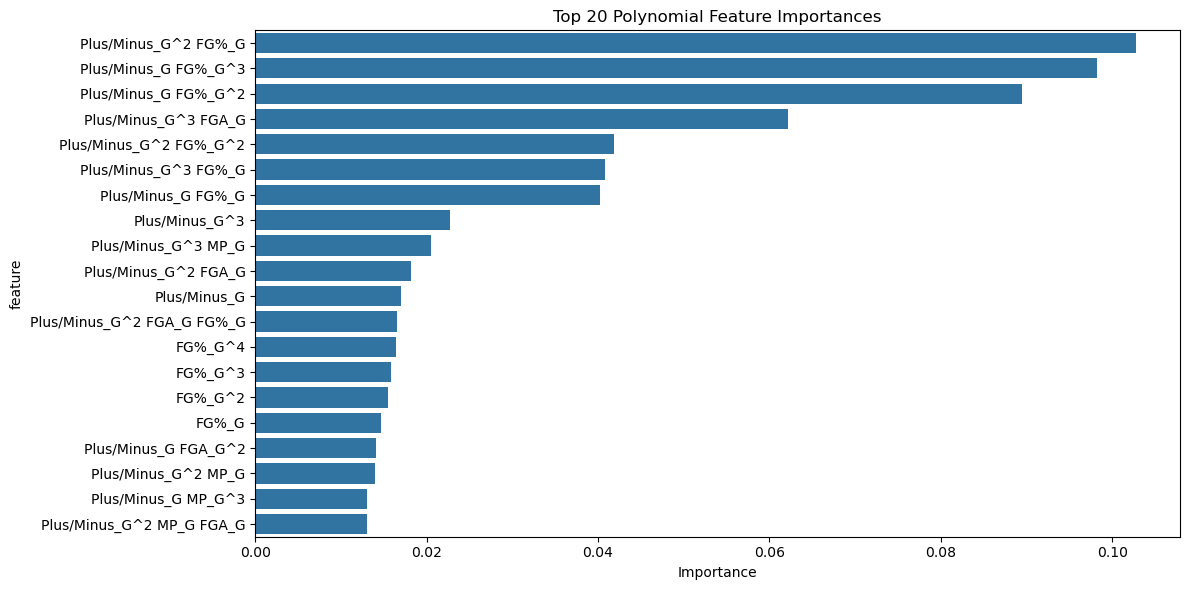

In [30]:
#Get polynomial feature names
poly_features = poly_preprocessor.named_transformers_['poly'].named_steps['poly'].get_feature_names_out(top_features)

# Get feature importances from the random forest
importances = poly_rf_pipeline.named_steps['regressor'].feature_importances_

# Create importance DataFrame
poly_importance = pd.DataFrame({
    'feature': poly_features,
    'importance': importances
}).sort_values('importance', ascending=False)

# Plot top 20 polynomial features
plt.figure(figsize=(12, 6))
sns.barplot(data=poly_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Polynomial Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

Polynomial features caused the importance of the features to go down, over complexity over features is not helping the model.

# Applying different feature engineering techniques


Given that the top most important features are relates to per game performance, let's try to see what happens if we remove seasonal stats. I'll also keep the advanced stats.

In [31]:
df.columns

Index(['Team', 'Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'W/L_Margin', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP',
       'Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn',
       '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn',
       'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn',
       'PF_Sn', 'PTS_Sn'],
      dtype='object')

In [32]:
df_per_game = df[['Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'Ttl_MP_Sn', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP', 'W/L_Margin']]
df_per_game

,Home/Away,Opp,MP_G,FG_G,FGA_G,FG%_G,3P_G,3PA_G,3P%_G,FT_G,FTA_G,FT%_G,ORB_G,DRB_G,TRB_G,AST_G,STL_G,BLK_G,TOV_G,PF_G,PTS_G,GmSc,Plus/Minus_G,Ttl_MP_Sn,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,ValORP,W/L_Margin
0,Away,PHO,19,1,3,0.333,1,3,0.333,0,0,0.000,0,1,1,1,0,0,0,1,3,1.9,-3,1591.0,12.7,0.549,0.320,0.212,1.7,9.6,5.7,22.6,1.1,0.2,12.5,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,-21
1,Home,MIN,20,3,7,0.429,1,4,0.250,0,0,0.000,0,0,0,1,1,0,1,0,7,4.0,2,1591.0,12.7,0.549,0.320,0.212,1.7,9.6,5.7,22.6,1.1,0.2,12.5,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,4
2,Home,CHI,14,2,7,0.286,2,4,0.500,0,0,0.000,0,1,1,2,1,0,0,0,6,4.6,4,1591.0,12.7,0.549,0.320,0.212,1.7,9.6,5.7,22.6,1.1,0.2,12.5,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,6
3,Away,ATL,18,3,9,0.333,0,3,0.000,0,0,0.000,0,5,5,1,0,0,1,2,6,1.3,5,1591.0,12.7,0.549,0.320,0.212,1.7,9.6,5.7,22.6,1.1,0.2,12.5,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,-7
4,Away,TOR,29,3,11,0.273,2,4,0.500,0,0,0.000,0,3,3,4,1,0,2,2,8,3.4,-3,1591.0,12.7,0.549,0.320,0.212,1.7,9.6,5.7,22.6,1.1,0.2,12.5,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Away,MIL,39,16,32,0.500,2,6,0.333,9,11,0.818,1,5,6,8,0,0,1,4,43,31.4,11,2726.0,23.4,0.592,0.319,0.302,1.8,9.7,5.7,33.5,1.3,0.4,9.1,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,13
463,Away,CHI,42,13,24,0.542,7,12,0.583,12,12,1.000,0,3,3,8,1,0,1,0,45,39.9,9,2726.0,23.4,0.592,0.319,0.302,1.8,9.7,5.7,33.5,1.3,0.4,9.1,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,11
464,Away,BOS,30,15,23,0.652,6,11,0.545,3,5,0.600,0,2,2,4,0,0,2,2,39,28.7,28,2726.0,23.4,0.592,0.319,0.302,1.8,9.7,5.7,33.5,1.3,0.4,9.1,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,9
465,Home,BRK,36,10,25,0.400,3,7,0.429,7,7,1.000,0,1,1,11,1,0,0,2,30,24.7,7,2726.0,23.4,0.592,0.319,0.302,1.8,9.7,5.7,33.5,1.3,0.4,9.1,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,4


In [33]:
df_per_game.columns

Index(['Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G', '3PA_G',
       '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G', 'AST_G',
       'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc', 'Plus/Minus_G',
       'Ttl_MP_Sn', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'ValORP', 'W/L_Margin'],
      dtype='object')

# Modeling Pipeline with just per game stats and advanced stats

In [34]:
# Train-Test Split

X= df_per_game.drop(columns=['W/L_Margin'])
y = df_per_game['W/L_Margin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
# Following the lead of the first hypertuned model, but giving grid search some range just in case.

categorical_features = ['Home/Away', 'Opp']
numerical_features = ['MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G', '3PA_G',
       '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G', 'AST_G',
       'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc', 'Plus/Minus_G',
       'Ttl_MP_Sn', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'ValORP']

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False), categorical_features),
        ('scaler', MinMaxScaler(feature_range=(-1,1)), numerical_features)
    ], 
    remainder='passthrough'
)

rf_pipeline_3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42,
                                        oob_score=True,
                                        bootstrap = True))
])


param_grid = {
    'regressor__n_estimators': [100, 200, 300], 
    'regressor__max_depth': [10, 20, 30]

}

grid_search_3 = GridSearchCV(rf_pipeline_3, 
                           param_grid, 
                           cv=5, 
                           scoring='r2')

grid_search_3.fit(X_train, y_train)

y_pred_3 = grid_search_3.predict(X_test)

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

In [36]:
print("Best parameters found:", grid_search_3.best_params_)

print("Best cross-validation score:", grid_search_3.best_score_)

best_rf_3 = grid_search_3.best_estimator_.named_steps['regressor']
print(f"OOB Score: {best_rf_3.oob_score_}")



Best parameters found: {'regressor__max_depth': 10, 'regressor__n_estimators': 300}
Best cross-validation score: 0.4173522219823175
OOB Score: 0.4478100449268406


There are a few instances in the data where Brunson is inactive or did not play in a game for whatever reason (labeled as 99 or 99). I kept them in case there were some correlations between success/lack of and his playtime. I want to remove them and see if the model was seeing this as noise/outliers. 

In [37]:
df[df['FT_G'] == 99]

no_outliers_df = df[df['FT_G'] != 99]

In [38]:
df[df['FT_G'] == 98]

,Team,Home/Away,Opp,MP_G,FG_G,FGA_G,FG%_G,3P_G,3PA_G,3P%_G,FT_G,FTA_G,FT%_G,ORB_G,DRB_G,TRB_G,AST_G,STL_G,BLK_G,TOV_G,PF_G,PTS_G,GmSc,Plus/Minus_G,W/L_Margin,...,BPM,ValORP,Avg_MP_Sn,FG_Sn,FGA_Sn,FG%_Sn,3P_Sn,3PA_Sn,3P%_Sn,2P_Sn,2PA_Sn,2P%_Sn,eFG%_Sn,FT_Sn,FTA_Sn,FT%_Sn,ORB_Sn,DRB_Sn,TRB_Sn,AST_Sn,STL_Sn,BLK_Sn,TOV_Sn,PF_Sn,PTS_Sn
78,DAL,Home,MEM,98,98,98,98.0,98,98,98.0,98,98,98.0,98,98,98,98,98,98,98,98,98,98.0,98,-10,...,-1.7,0.1,21.8,3.6,7.7,0.467,0.9,2.5,0.348,2.8,5.3,0.523,0.523,1.2,1.6,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
139,DAL,Home,MIN,98,98,98,98.0,98,98,98.0,98,98,98.0,98,98,98,98,98,98,98,98,98,98.0,98,16,...,-0.9,0.3,17.9,3.2,6.8,0.466,0.8,2.1,0.358,2.4,4.7,0.515,0.522,1.1,1.3,0.813,0.4,2.0,2.4,3.3,0.4,0.1,1.2,1.3,8.2
140,DAL,Away,SAS,98,98,98,98.0,98,98,98.0,98,98,98.0,98,98,98,98,98,98,98,98,98,98.0,98,6,...,-0.9,0.3,17.9,3.2,6.8,0.466,0.8,2.1,0.358,2.4,4.7,0.515,0.522,1.1,1.3,0.813,0.4,2.0,2.4,3.3,0.4,0.1,1.2,1.3,8.2
141,DAL,Away,MIA,98,98,98,98.0,98,98,98.0,98,98,98.0,98,98,98,98,98,98,98,98,98,98.0,98,-8,...,-0.9,0.3,17.9,3.2,6.8,0.466,0.8,2.1,0.358,2.4,4.7,0.515,0.522,1.1,1.3,0.813,0.4,2.0,2.4,3.3,0.4,0.1,1.2,1.3,8.2
142,DAL,Away,MIN,98,98,98,98.0,98,98,98.0,98,98,98.0,98,98,98,98,98,98,98,98,98,98.0,98,20,...,-0.9,0.3,17.9,3.2,6.8,0.466,0.8,2.1,0.358,2.4,4.7,0.515,0.522,1.1,1.3,0.813,0.4,2.0,2.4,3.3,0.4,0.1,1.2,1.3,8.2
143,DAL,Away,CHI,98,98,98,98.0,98,98,98.0,98,98,98.0,98,98,98,98,98,98,98,98,98,98.0,98,-2,...,-0.9,0.3,17.9,3.2,6.8,0.466,0.8,2.1,0.358,2.4,4.7,0.515,0.522,1.1,1.3,0.813,0.4,2.0,2.4,3.3,0.4,0.1,1.2,1.3,8.2
144,DAL,Home,NOP,98,98,98,98.0,98,98,98.0,98,98,98.0,98,98,98,98,98,98,98,98,98,98.0,98,4,...,-0.9,0.3,17.9,3.2,6.8,0.466,0.8,2.1,0.358,2.4,4.7,0.515,0.522,1.1,1.3,0.813,0.4,2.0,2.4,3.3,0.4,0.1,1.2,1.3,8.2
145,DAL,Home,MEM,98,98,98,98.0,98,98,98.0,98,98,98.0,98,98,98,98,98,98,98,98,98,98.0,98,25,...,-0.9,0.3,17.9,3.2,6.8,0.466,0.8,2.1,0.358,2.4,4.7,0.515,0.522,1.1,1.3,0.813,0.4,2.0,2.4,3.3,0.4,0.1,1.2,1.3,8.2
146,DAL,Home,IND,98,98,98,98.0,98,98,98.0,98,98,98.0,98,98,98,98,98,98,98,98,98,98.0,98,-3,...,-0.9,0.3,17.9,3.2,6.8,0.466,0.8,2.1,0.358,2.4,4.7,0.515,0.522,1.1,1.3,0.813,0.4,2.0,2.4,3.3,0.4,0.1,1.2,1.3,8.2
147,DAL,Away,SAS,98,98,98,98.0,98,98,98.0,98,98,98.0,98,98,98,98,98,98,98,98,98,98.0,98,-10,...,-0.9,0.3,17.9,3.2,6.8,0.466,0.8,2.1,0.358,2.4,4.7,0.515,0.522,1.1,1.3,0.813,0.4,2.0,2.4,3.3,0.4,0.1,1.2,1.3,8.2


In [39]:
no_outliers_df = df[df['FT_G'] != 98]

 Let's try running the model on the new dataset.

## Modeling after removing outliers

In [40]:
no_outliers_df.columns

Index(['Team', 'Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'W/L_Margin', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP',
       'Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn',
       '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn',
       'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn',
       'PF_Sn', 'PTS_Sn'],
      dtype='object')

In [41]:
X = no_outliers_df.drop(columns=['W/L_Margin'])
y = no_outliers_df['W/L_Margin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [42]:
categorical_features = ['Team','Home/Away', 'Opp','Season']
numerical_features = ['MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'Ttl_MP_Sn', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP',
       'Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn',
       '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn',
       'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn',
       'PF_Sn', 'PTS_Sn']

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False), categorical_features),
        ('scaler', MinMaxScaler(feature_range=(-1,1)), numerical_features)
    ], 
    remainder='passthrough'
)

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

no_outliers_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42,
                                        oob_score=True))
])



param_grid = {
    'regressor__n_estimators': [50, 100, 300],
    'regressor__max_depth': [5, 10, 20, 30, 40],
    'regressor__bootstrap': [True],
    

}

grid_search_4 = GridSearchCV(no_outliers_pipeline, 
                           param_grid, 
                           cv=5, 
                           scoring='r2')

grid_search_4.fit(X_train, y_train)


/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Team',
                                                                          'Home/Away',
                                                                          'Opp',
                                                                          'Season']),
                                                                        ('scaler',
                                                                         MinMaxScaler(feature_range=(-1,
                                                                                                     1)),
                                                                         ['MP_G',
                                                                          'FG_G',
                                                                          'FGA_G',
                                                                          'FG%_G',
                                                                          '3P_G',
                                                                          '3PA_G',
                                                                          '3P%_G',
                                                                          'FT_G',
                                                                          'FTA_G',
                                                                          'FT%_G',
                                                                          'ORB_G',
                                                                          'DRB_G',
                                                                          'TRB_G',
                                                                          'AST_G',
                                                                          'STL_G',
                                                                          'BLK_G',
                                                                          'TOV_G',
                                                                          'PF_G',
                                                                          'PTS_G',
                                                                          'GmSc',
                                                                          'Plus/Minus_G',
                                                                          'Ttl_MP_Sn',
                                                                          'PER',
                                                                          'TS%',
                                                                          '3PAr',
                                                                          'FTr',
                                                                          'ORB%',
                                                                          'DRB%',
                                                                          'TRB%',
                                                                          'AST%', ...])])),
                                       ('regressor',
                                        RandomForestRegressor(oob_score=True,
                                                              random_state=42))]),
             param_grid={'regressor__bootstrap': [True],
                         'regressor__max_depth': [5, 10, 20, 30, 40],
                         'regressor__n_estimators': [50, 100, 300]},
             scoring='r2')

In [44]:
cv_scores_4 = cross_val_score(no_outliers_pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation scores: {cv_scores_4}")
print(f"Mean cross-validation score: {cv_scores_4.mean()}")


print("Best parameters found:", grid_search_4.best_params_)

print("Best cross-validation score:", grid_search_4.best_score_)

y_pred_4 = grid_search_4.predict(X_test)

best_rf_4 = grid_search_4.best_estimator_.named_steps['regressor']

print(f"R2 Score: {r2_score(y_test, y_pred_4):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_4):.4f}")
print(f"OOB Score: {best_rf_4.oob_score_}")







/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

Cross-validation scores: [0.22263946 0.31494039 0.42187341 0.50711045 0.63889673]
Mean cross-validation score: 0.421092086407886
Best parameters found: {'regressor__bootstrap': True, 'regressor__max_depth': 10, 'regressor__n_estimators': 300}
Best cross-validation score: 0.4219537804739579
R2 Score: 0.4083
MSE: 107.7370
OOB Score: 0.45427130508229374


Removing the outliers did not change the model at all.

In [45]:
#Assessing correlations between features and target variable

def check_numerical_correlations(df, target='W/L_Margin'):
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
    correlations = df[numerical_features].corrwith(df[target]).sort_values(ascending=False)
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    correlations.plot(kind='bar')
    plt.title(f'Feature Correlations with {target}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return correlations

def check_spearman_correlations(df, target='W/L_Margin'):
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
    correlations = df[numerical_features].apply(lambda x: x.corr(df[target], method='spearman')).sort_values(ascending=False)
    
    return correlations

from sklearn.feature_selection import mutual_info_regression

def check_categorical_correlations(df, categorical_cols, target='W/L_Margin'):
    # Convert categorical columns to numeric using label encoding
    df_encoded = pd.get_dummies(df[categorical_cols])
    
    # Calculate mutual information scores
    mi_scores = mutual_info_regression(df_encoded, df[target])
    
    # Create DataFrame with results
    feature_importance = pd.DataFrame({
        'Feature': df_encoded.columns,
        'Mutual Information Score': mi_scores
    }).sort_values('Mutual Information Score', ascending=False)
    
    return feature_importance

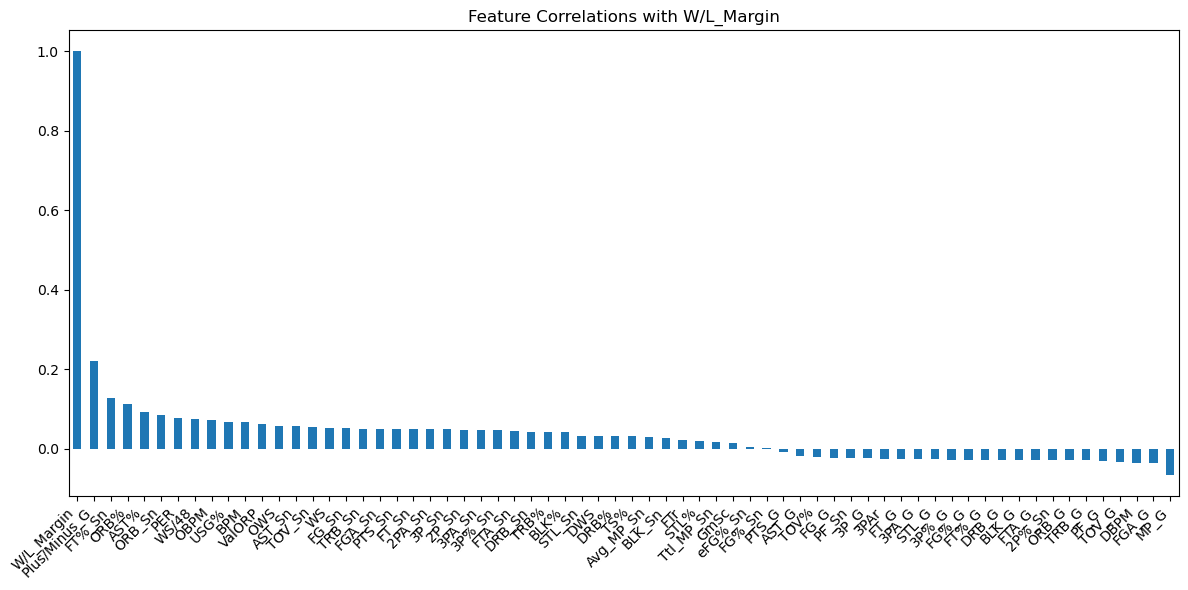

Top 10 Pearson Correlations:
W/L_Margin      1.000000
Plus/Minus_G    0.220996
FT%_Sn          0.127332
ORB%            0.113117
AST%            0.090990
ORB_Sn          0.085788
PER             0.076731
WS/48           0.075438
OBPM            0.071767
USG%            0.066507
dtype: float64

Top 10 Spearman Correlations:
W/L_Margin      1.000000
Plus/Minus_G    0.551810
ORB%            0.152443
FT%_Sn          0.122241
USG%            0.111824
FG%_G           0.107634
TRB_Sn          0.100942
GmSc            0.099607
ORB_Sn          0.098654
AST_Sn          0.093143
dtype: float64

Categorical Feature Importance:
           Feature  Mutual Information Score
23         Opp_ORL                  0.053389
12         Opp_HOU                  0.038225
30         Opp_UTA                  0.038014
10         Opp_DET                  0.033892
16         Opp_MEM                  0.023508
25         Opp_PHO                  0.020747
2          Opp_ATL                  0.020477
0   Home/Away_Awa

In [46]:
numerical_corr = check_numerical_correlations(df)
spearman_corr = check_spearman_correlations(df)
categorical_corr = check_categorical_correlations(df, ['Home/Away', 'Opp'])

print("Top 10 Pearson Correlations:")
print(numerical_corr.head(10))
print("\nTop 10 Spearman Correlations:")
print(spearman_corr.head(10))
print("\nCategorical Feature Importance:")
print(categorical_corr)

# Implementing PCA to address high dimensionality and multi 